<a href="https://colab.research.google.com/github/Pablobm3/Detector-de-Balsas/blob/main/mascaras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


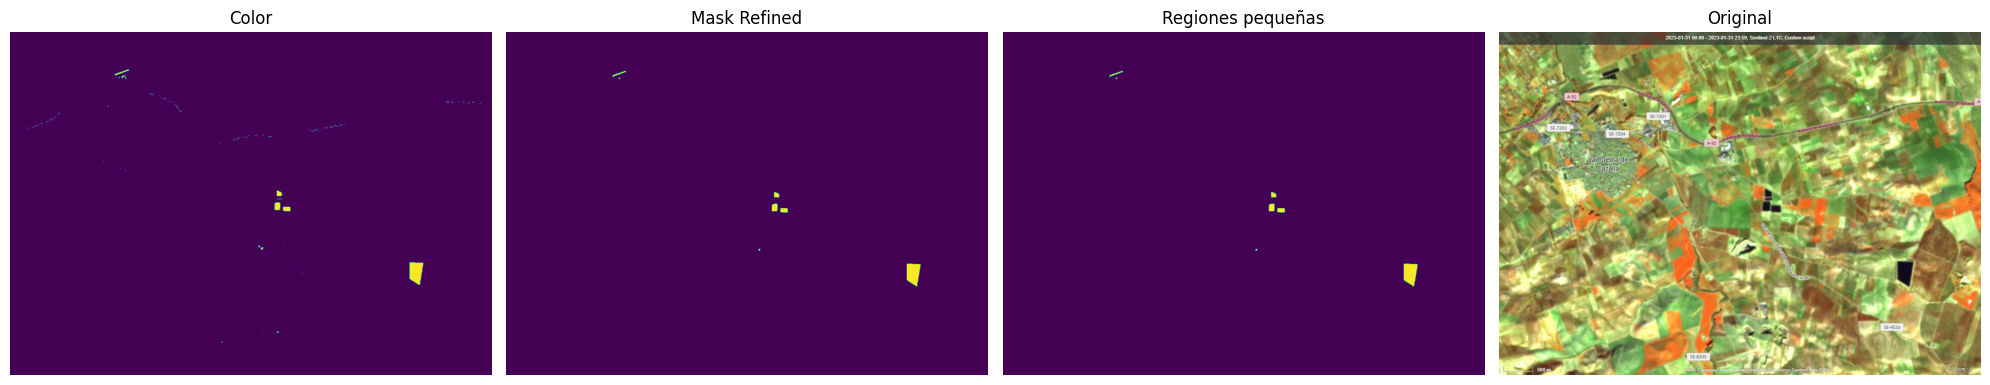

In [38]:
imgruta= '/content/drive/MyDrive/imagenes_balsas/Balsa22.jpg'

from skimage.measure import label, regionprops
import scipy.ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.draw import polygon_perimeter
from skimage.segmentation import active_contour
from skimage import io,measure
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray



import cv2


#Filtros de color
img = io.imread(imgruta)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)


mask = cv2.inRange(hsv, (100, 50, 20), (130, 255, 80))
mask1 = cv2.inRange(hsv, (0,0,0), (255, 255, 30))
mask2= cv2.inRange(hsv, (110,50,20), (130, 255, 60))
maskrgb = cv2.inRange(img, (17, 9, 27), (47, 12, 101))
maskycrcb = cv2.inRange(ycrcb, (0, 135, 85), (255, 170, 120))
maskyrcrcb1 = cv2.inRange(ycrcb, (0, 135, 85), (100, 175, 135))
maskyrcrcb2 = cv2.inRange(ycrcb, (0, 0, 0), (30, 255, 255))

combined_mask = cv2.bitwise_or(mask, mask1)
combined_mask = cv2.bitwise_or(combined_mask, mask2)

combined_mask = cv2.bitwise_or(combined_mask, maskrgb)

combined_masky = cv2.bitwise_or(maskycrcb,maskyrcrcb1)
combined_masky = cv2.bitwise_or(combined_masky,maskyrcrcb2)

combined_mask = cv2.bitwise_or(combined_mask, combined_masky)






kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))  # Adjust kernel size
mask_opened = cv2.morphologyEx(combined_mask, cv2.MORPH_OPEN, kernel, iterations=2)
mask_refined = cv2.morphologyEx(mask_opened, cv2.MORPH_CLOSE, kernel,iterations=1)


# Etiquetar regiones
labeled_mask = measure.label(mask_refined)

# Calcular propiedades de las regiones
regions = regionprops(labeled_mask)

# Definir umbral de área (ajusta este valor según tus necesidades)
area_threshold = 5000

# Filtrar regiones por área
filtered_regions = [region for region in regions if region.area < area_threshold]

# Crear nueva máscara
filtered_mask = np.zeros_like(mask_refined, dtype=bool)
for region in filtered_regions:
    # Obtener las coordenadas de la región
    minr, minc, maxr, maxc = region.bbox
    # Asignar True a la nueva máscara en las coordenadas de la región
    filtered_mask[minr:maxr, minc:maxc] = region.image

# Ahora filtered_mask contiene solo las regiones que son más pequeñas que el umbral de área




"""
#Watershed
distance = ndi.distance_transform_edt(filtered_mask)

local_maxi = peak_local_max(distance,footprint=np.ones((3, 3)),labels=filtered_mask)

# Create an empty markers image with the same shape as the mask
markers = np.zeros_like(filtered_mask, dtype=int)

# Set marker values at the coordinates of local maxima
for i in range(local_maxi.shape[0]):
  markers[local_maxi[i][0], local_maxi[i][1]] = i + 1 # Assign unique marker values

labels = watershed(-distance, markers, mask=filtered_mask)
"""


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(combined_mask)
axes[0].set_title('Color')  # Set title for the second subplot
axes[0].axis('off')

axes[1].imshow(mask_refined)
axes[1].set_title('Mask Refined')  # Set title for the second subplot
axes[1].axis('off')

axes[2].imshow(filtered_mask)
axes[2].set_title('Regiones pequeñas')  # Set title for the second subplot
axes[2].axis('off')

axes[3].imshow(img)
axes[3].set_title('Original')  # Set title for the second subplot
axes[3].axis('off')

plt.tight_layout()
plt.show()









